# **Vintage Car Segmentation: Auto MPG**

--------------------------------------------------
## **Solution by: 'Femi Bolarinwa**
--------------------------------------------------

-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data and extract meaningful insights**.

-----------------------------
## **Dataset** 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Solution Content Overview:**
- **Libraries importation**
- **Data pre-processing, Missing Values treatment**
- **Exploratory Data Analysis (EDA)**
- **Principal Component Analysis (PCA)**
- **t-distributed Stochastic Neighbour Embedding (tSNE)**
- **Segmentation and Profiling**
- **Business Insights and Recommendation**

## **Libraries Importation**

In [222]:
#libraries for data manipulation
import pandas as pd  #for manipulating dataframes
import numpy as np   #for manipulating arrays

#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#library for data preprocessing (z-score) 
from sklearn.preprocessing import StandardScaler

#library for data projection/dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#to supress warning
import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [223]:
df = pd.read_csv("auto-mpg.csv")
data = df.copy() #keeping original copy of dataframe

In [224]:
data.head() #to check the right dataset has been loaded

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

                    car name  
0  chevrolet chevelle malibu  
1          buick skylark 320  
2         plymouth satellite  
3              amc rebel sst  
4                ford torino

In [225]:
data.tail()

mpg  cylinders  displacement horsepower  weight  acceleration  \
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year         car name  
393          82  ford mustang gl  
394          82        vw pickup  
395          82    dodge rampage  
396          82      ford ranger  
397          82       chevy s-10

In [226]:
data.shape #to get information about the number of rows and columns in the dataset

(398, 8)

**Observations:**
- The dataset has **398 rows and 8 observations**

### **Data Overview**

In [227]:
data.info() #to ensure that data is stored in the preferred format and the value of each property has expected datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**
- The dataset has **398 observations and 8 features**
- All the columns have 398 non-null values, suggesting, there are **no missing values**.
- **columns are of integer, float and object  data types**.
- horsepower column has 'object' data type. Needs to be converted to float for use

In [228]:
data.isnull().sum() #checking missing values

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
dtype: int64

## **Data Preprocessing and Exploratory Data Analysis**

#### **Checking the unique values in the 'car name' column**

In [229]:
data["car name"].nunique()

305

**Observation**
- The column 'car name' has object data type containing a lot of unique entries. It would not add values to the analysis.

#### Checking for missing values

**Observation**
- No missing values in any cell

#### Checking for duplicate observations

In [230]:
data.duplicated().sum()

0

**Observation**
- No duplicate rows

#### Dropping irrelevant columns

In [231]:
#Dropping the column 'car name' since it adds no informative value to the analysis
data = data.drop(['car name'], axis = 1)

#### **Checking and treating the horsepower column**

In [232]:
# Checking if there are values other than digits in the column 'horsepower'
hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # If the string consists of digits return True else False
data[hpIsDigit['horsepower'] == False]   # show only those rows where horsepower is not a digit

mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0          ?    2046          19.0   
126  21.0          6         200.0          ?    2875          17.0   
330  40.9          4          85.0          ?    1835          17.3   
336  23.6          4         140.0          ?    2905          14.3   
354  34.5          4         100.0          ?    2320          15.8   
374  23.0          4         151.0          ?    3035          20.5   

     model year  
32           71  
126          74  
330          80  
336          80  
354          81  
374          82

**Observations:**
- There are **6 observations where horsepower is ?**. I will treat these values as **missing values**.
- I'll **impute these missing values and change the data type** of horsepower column. 
- First, I'll **replace the ? with np.nan**.

In [233]:
# Replacing ? with np.nan
data = data.replace('?', np.nan)
data[hpIsDigit['horsepower'] == False]

mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0        NaN    2046          19.0   
126  21.0          6         200.0        NaN    2875          17.0   
330  40.9          4          85.0        NaN    1835          17.3   
336  23.6          4         140.0        NaN    2905          14.3   
354  34.5          4         100.0        NaN    2320          15.8   
374  23.0          4         151.0        NaN    3035          20.5   

     model year  
32           71  
126          74  
330          80  
336          80  
354          81  
374          82

In [234]:
# Imputing the missing values with the median value of the column horsepower
data.horsepower.fillna(data.horsepower.median(), inplace = True)
# Converting the horsepower column from object data type to float
data['horsepower'] = data['horsepower'].astype('float64')  

### **Summary Statistics**

In [235]:
data.describe().T #to check statistical summary

count         mean         std     min       25%     50%  \
mpg           398.0    23.514573    7.815984     9.0    17.500    23.0   
cylinders     398.0     5.454774    1.701004     3.0     4.000     4.0   
displacement  398.0   193.425879  104.269838    68.0   104.250   148.5   
horsepower    398.0   104.304020   38.222625    46.0    76.000    93.5   
weight        398.0  2970.424623  846.841774  1613.0  2223.750  2803.5   
acceleration  398.0    15.568090    2.757689     8.0    13.825    15.5   
model year    398.0    76.010050    3.697627    70.0    73.000    76.0   

                   75%     max  
mpg             29.000    46.6  
cylinders        8.000     8.0  
displacement   262.000   455.0  
horsepower     125.000   230.0  
weight        3608.000  5140.0  
acceleration    17.175    24.8  
model year      79.000    82.0

**Observations:**
- 75% of the cars 29 or less miles per gallon
- Average number of cylinder on the vintage cars is ~5
- The engine size distribution is highly skewed. Univariate analysis will shed more light.
- 50% of cars have 93.5hp or less
- Half of the cars weigh ~3000lbs or less
- 25% of the cars take ~17 sec or more to accelerate to 60mph
- All vintage cars are from '82 or earlier

### Univariate Analysis

mpg
Skew : 0.46


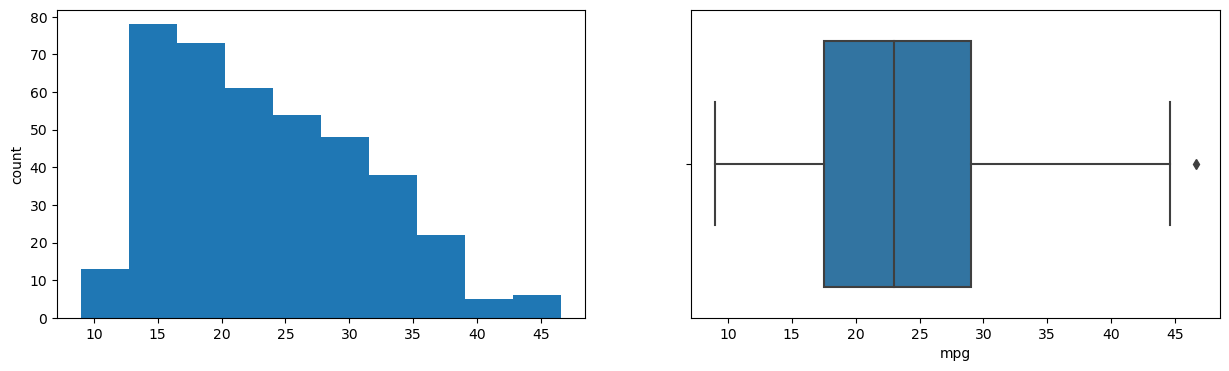

cylinders
Skew : 0.53


displacement
Skew : 0.72


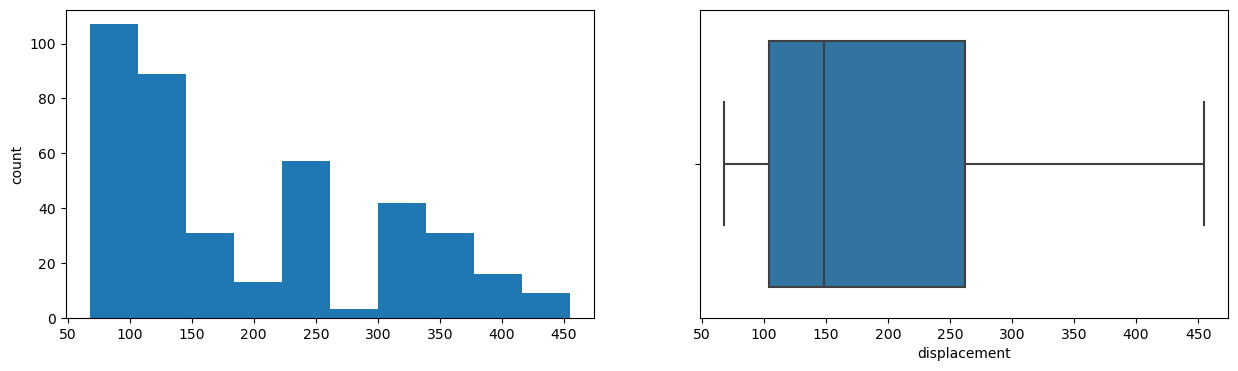

horsepower
Skew : 1.11


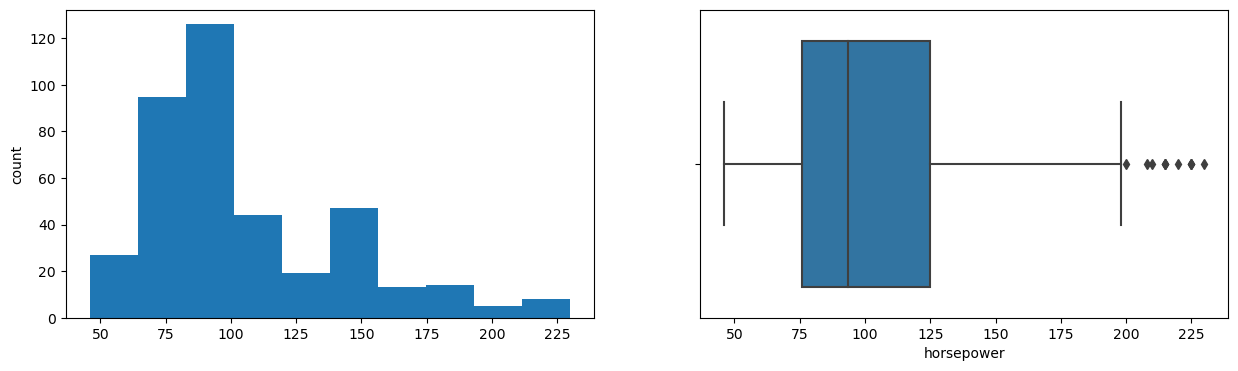

weight
Skew : 0.53


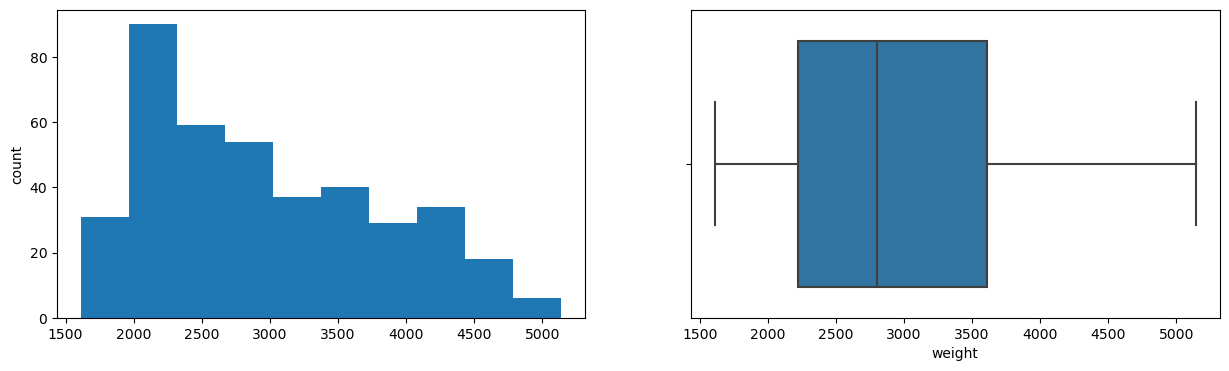

acceleration
Skew : 0.28


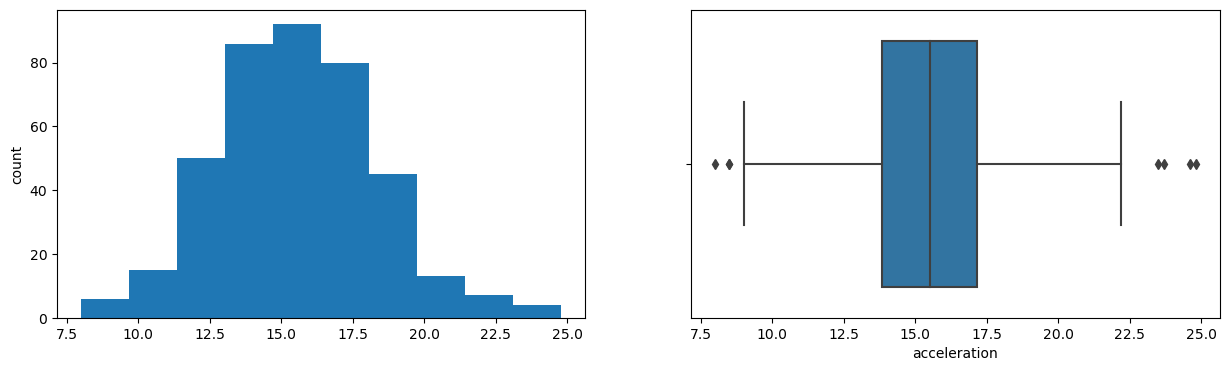

model year
Skew : 0.01


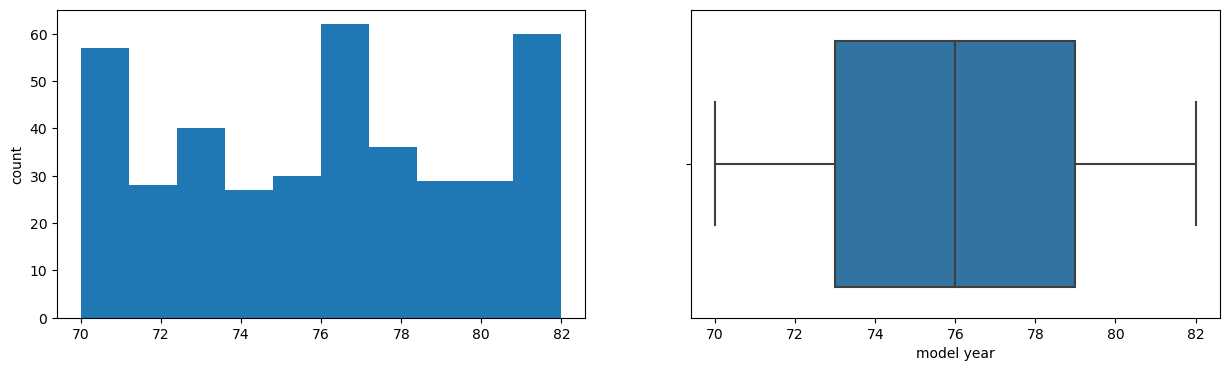

In [236]:
for col in data.columns:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(bins = 10, grid = False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x = data[col])
    plt.show()

**Observations:**
- Acceleration appears to have a near normal distribution
- All distribution are somewhat right skewed
- mpg, acceleration and horsepower have a few outliers

### Bivariate Analysis

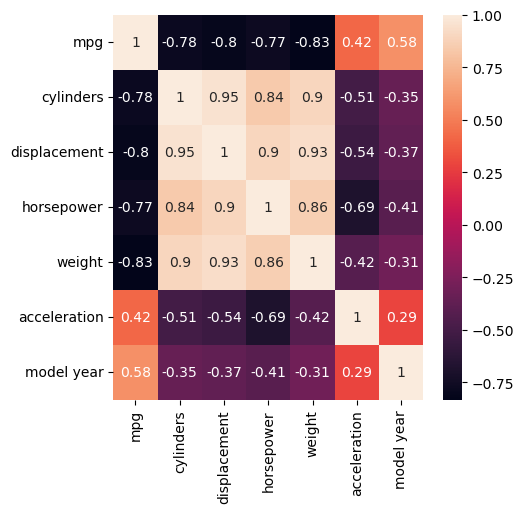

In [237]:
plt.figure(figsize = (5,5))
sns.heatmap(data.corr(), annot = True)
plt.show()

**Observations:**
- mpg has significant negative correlation with horsepower, weight, cylinders, and displacement.
- model year is positively correlated with mpg suggesting car got more fuel efficient with time.
- horsepower and acceleration are negatively correlated.
- weight has a strong positive correlation with horsepower, displacement, and cylinders. This makes sense intuitively.

### **Scaling the data**
Scaling helps ensure the variances of features(columns) are comparable.

In [238]:
# Scaling the data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [239]:
data_scaled.head()

mpg  cylinders  displacement  horsepower    weight  acceleration  \
0 -0.706439   1.498191      1.090604    0.673118  0.630870     -1.295498   
1 -1.090751   1.498191      1.503514    1.589958  0.854333     -1.477038   
2 -0.706439   1.498191      1.196232    1.197027  0.550470     -1.658577   
3 -0.962647   1.498191      1.061796    1.197027  0.546923     -1.295498   
4 -0.834543   1.498191      1.042591    0.935072  0.565841     -1.840117   

   model year  
0   -1.627426  
1   -1.627426  
2   -1.627426  
3   -1.627426  
4   -1.627426

## **Principal Component Analysis**

In [240]:
#setting number of PCA components to number of feautures in the data:
n = data_scaled.shape[1]
# Creating a PCA object with n_componenents = n, and random_state = 1 for reproducibility:
pca = PCA(n_components = n, random_state = 1)
# Fit scaled data into pca object and transform to dataframe
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])   

In [241]:
data_pca1.shape

(398, 7)

In [242]:
# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_
np.round(exp_var*100,2)

array([71.48, 12.37, 10.41,  2.67,  1.78,  0.79,  0.5 ])

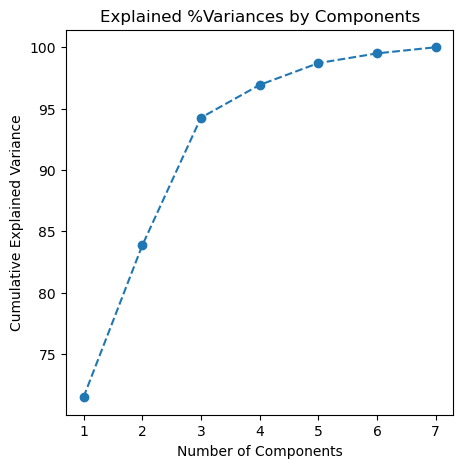

In [243]:
# Visualize the explained variance by individual components
plt.figure(figsize = (5,5))
plt.plot(range(1, 8), 100*exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained %Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [244]:
# Finding the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.90):
        print("Number of PCs that explain at least 90% variance: ", ix + 1)
        break

Number of PCs that explain at least 90% variance:  3


**Observations:**
- Each PC represents an eigenvector of the covariance/correlation matrix of the dataset
- The explained variances of the principal components are the corresponding eigenvalues of the eigenvectors.
- PC1 captures or explains the most variance (about 70%) in the data set. PC7 explains the least (0.5%)
- 3 of 7 components captures (or explains) about 95% of variances in the dataset. 
- That means 57% dimensionality reduction with only 5% loss in explained variance.

#### **Interpreting the coefficients of the first three principal components from the below DataFrame**

In [245]:
pc_comps = ['PC1', 'PC2', 'PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:],2), index = pc_comps, columns = data_scaled.columns)
data_pca.T

PC1   PC2   PC3
mpg          -0.40 -0.21 -0.26
cylinders     0.42 -0.19  0.14
displacement  0.43 -0.18  0.10
horsepower    0.42 -0.09 -0.17
weight        0.41 -0.22  0.28
acceleration -0.28  0.02  0.89
model year   -0.23 -0.91 -0.02

In [246]:
def color_high(val):
    if val <= -0.40:
        return 'background: pink'
    elif val >= 0.40:
        return 'background: skyblue'   
data_pca.T.style.applymap(color_high)

**Observations:**
- Each principal component (PC) is a linear combination of the features (components) of the original dataset. 
- The features are weighted by the coefficients shown above.
- Some features have more effect on the principal components than others as highlighted in colors above.

#### **Visualizing the data in 2 and 3 dimensions using the first 2 and 3 principal components respectively**

In [247]:
#2D
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'PC1', y = 'PC2', data = data_pca1)
plt.show()

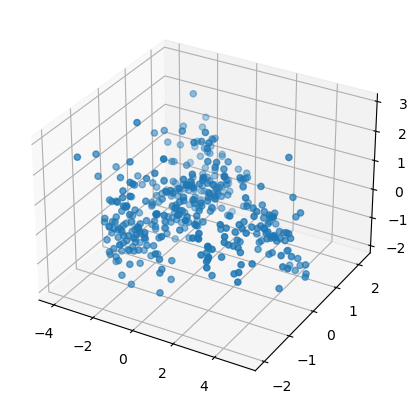

In [248]:
#3D
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d')
x = data_pca1['PC1']
y = data_pca1['PC2']
z = data_pca1['PC3']
ax.scatter(x, y, z)
plt.show()

**Observations:**
- PCA provides no apparent cluster or pattern either in 2 or 3D
- I will try another dimentionality reduction technique - TSNE (t-distributed stochastic neighbour embedding)

## **t-SNE**

In [249]:
# Fitting t-SNE with number of components equal to 2 
tsne = TSNE(n_components = 2, random_state = 1)
data_tsne = tsne.fit_transform(data_scaled)

In [250]:
data_tsne.shape

(398, 2)

In [251]:
# Converting the embeddings to a dataframe
data_tsne = pd.DataFrame(data_tsne, columns = ['X1', 'X2'])

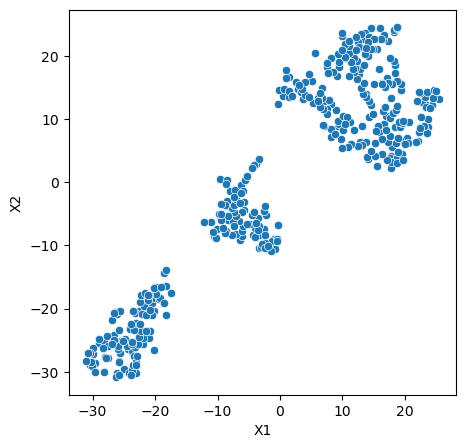

In [252]:
# Scatter plot for two components
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)
plt.show()

**Observations:**
- tSNE clearly provides patterns in the data but took more compuatational time.
- The are 3 groups of cars in the data.
- I'll try to identify the peculiarity of each group or cluster. My first guess is number of cylinder

## Segmentation and Profiling

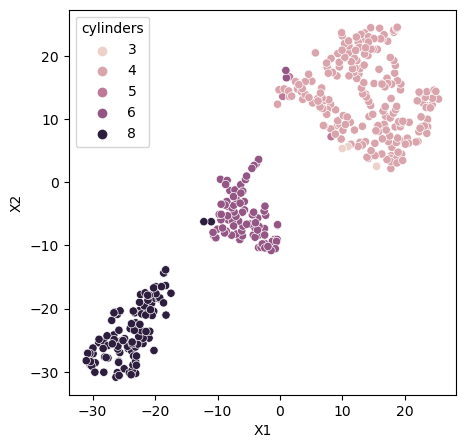

In [253]:
# Let's see the scatter plot of the data w.r.t number of cylinders
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne, hue = data.cylinders)
plt.show()

**Observations:**
- Number of cylinders appears to be a major factor distinguishing the groups
- There is a slight overlap among the groups
- I'll try to figure out other distinguishing factors without using clustering algorithm like kmean, gmm, PAM, etc

#### **Visualizing the clusters w.r.t different variables using scatter plot and box plot**

In [254]:
#I'll write a function to demarcate the 3 different groups based on there location on the tsne-plane
def grouping(x):
    first_component = x['X1']
    second_component = x['X2']
    if (first_component > -1) and (second_component > -5): 
        return 'group_1'
    if (first_component > -15 ) and (first_component < 5):
        return 'group_2'
    else: 
        return 'group_3'

In [255]:
#applying the function to my tsne data
data_tsne['groups'] = data_tsne.apply(grouping, axis = 1)

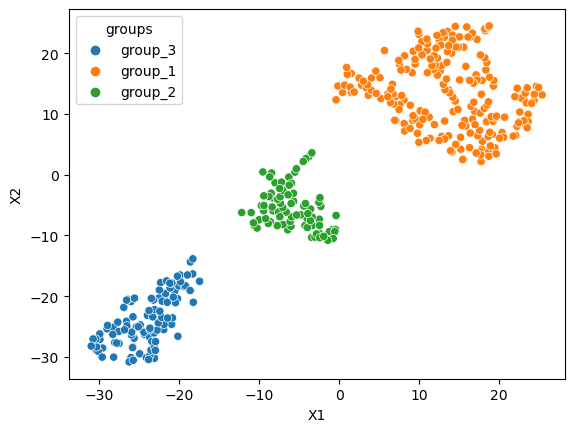

In [256]:
sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne, hue = data_tsne.groups)
plt.show()

In [257]:
#attaching the group identifiers to the original dataset
data['groups'] = data_tsne['groups'] 

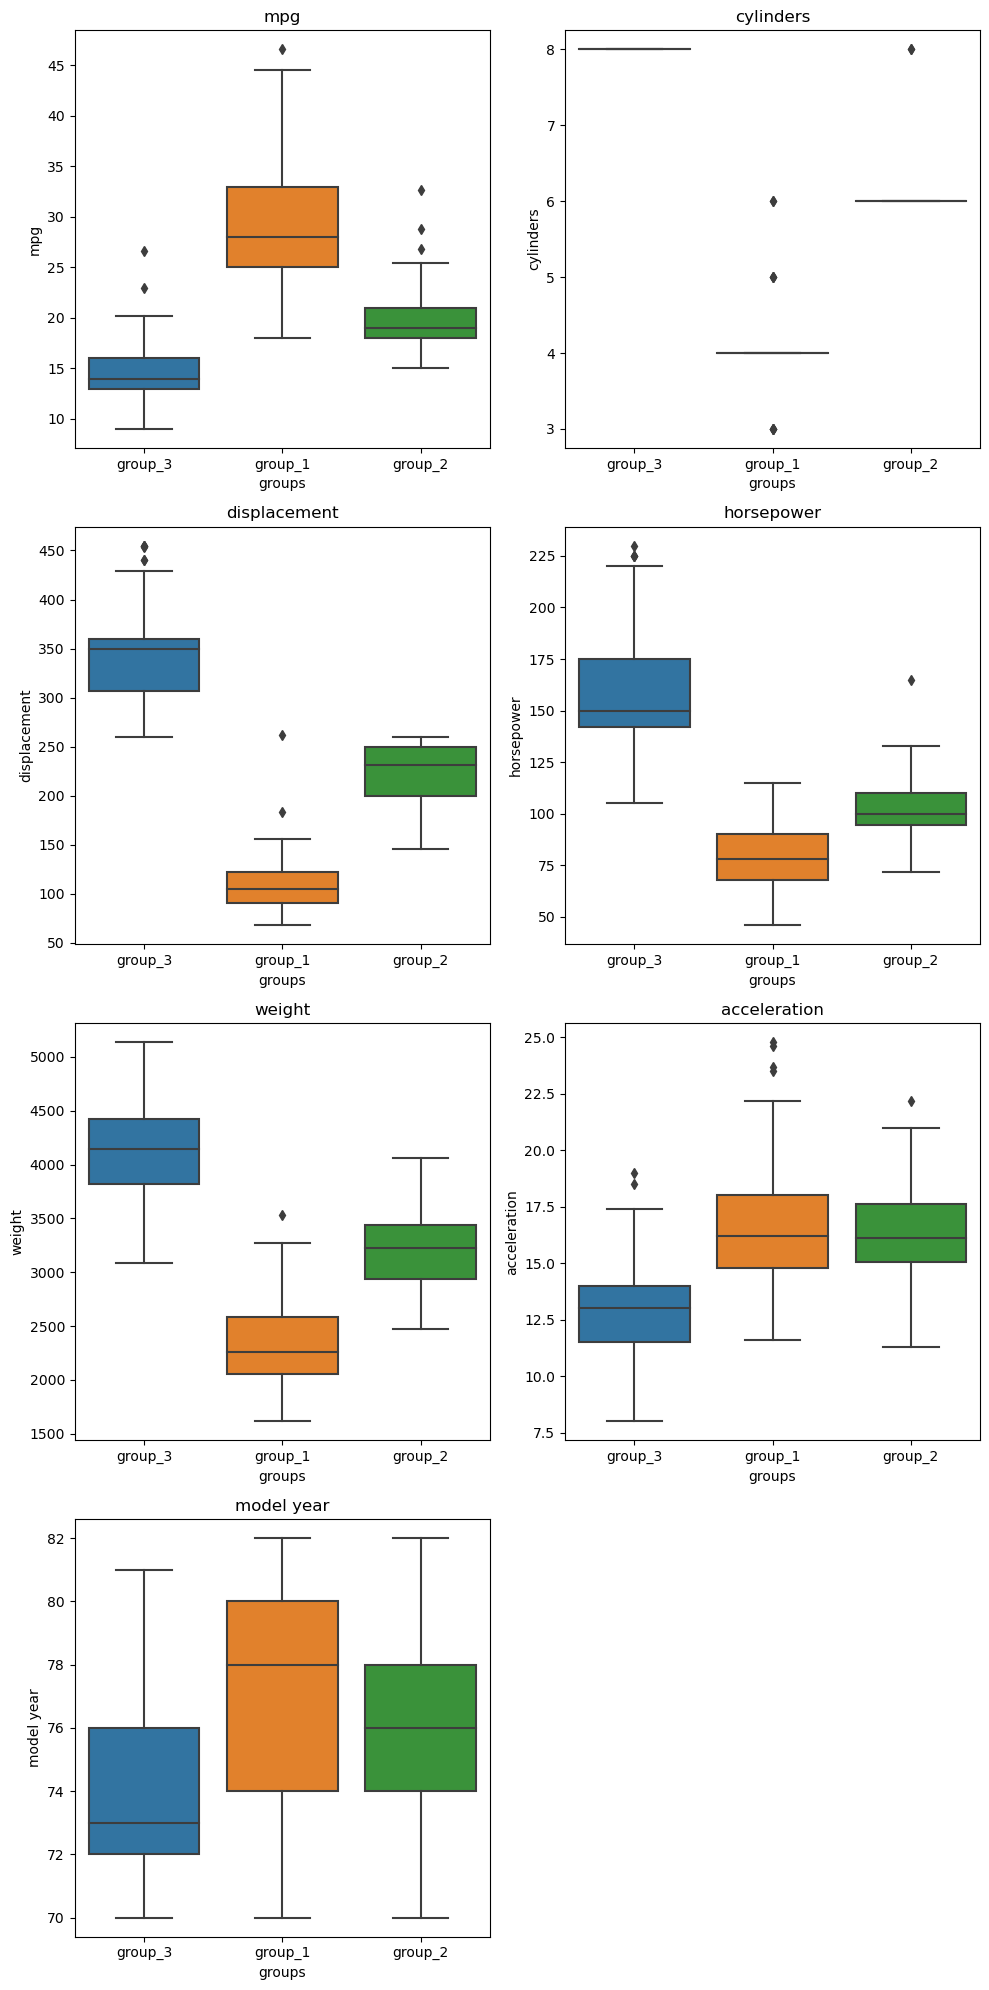

In [258]:
all_col = data.columns.tolist()
plt.figure(figsize = (10, 20))
for i, variable in enumerate(all_col): 
    if i == 7:
        break
    plt.subplot(4, 2, i + 1)
    # Creating the boxplot with groups on the x-axis and variable on the y-axis (using the DataFrame 'data')
    sns.boxplot(y=data[variable], x=data_tsne['groups'])  
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Observations:**
- Group 1: vintage cars with 4 cylinders, high mpg, small engine size, low horsepower, light weight, good acceleration - LEISURE CARS
- Group 2: vintage cars with 6 cylinders, moderate mpg, moderate engine size, moderate horsepower, moderate weight, good acceleration - UTILITY CARS
- Group 3: vintage cars with 8 cylinders, low mpg, large engine size, high horsepower, large weight, low acceleration - HEAVY DUTY CARS

## **Business Insights and Recommendations**
- Ads and promotions could be better targeted. Young people are more likely to be interested in Leisure cars, families - utility cars.
- Outlet managers can adjust the composition of there dealership shops based on the demography of the area or clientele. This also applies to new outlets.